# Mushroom Classification

## Import Libraries

In [1]:
# These installs are required each time you switch from/to CPU/GPU
!pip install scikeras
!pip install np_utils

In [2]:
# Dependencies and Libraries

# Tensorflow
import tensorflow as tf

# Other machine learning modules
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Commonly used modules
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

from sklearn.ensemble import RandomForestClassifier


## Load Dataset

In [3]:
# Dataset
url = "mushrooms.csv"

In [4]:
# Read in data and examine it
dataset = pd.read_csv(url)

## Summarize Dataset

In [5]:
# Look at the data
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# Rows and columns
dataset.shape

(8124, 23)

In [7]:
# Descriptive Statistics
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
# Datatypes and names of columns
dataset.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [9]:
# Check for Null values
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
# Look at data distribution
for x in dataset.columns:
  print(f"Column: {x}")
  print("-"*20)
  print(dataset[x].value_counts())
  print("")

Column: class
--------------------
class
e    4208
p    3916
Name: count, dtype: int64

Column: cap-shape
--------------------
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

Column: cap-surface
--------------------
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

Column: cap-color
--------------------
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

Column: bruises
--------------------
bruises
f    4748
t    3376
Name: count, dtype: int64

Column: odor
--------------------
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

Column: gill-attachment
--------------------
gill-attachment
f    7914
a     210
Name: count, dtype: int64

Column: gill-spacing
--------------------
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

Column: gill-size
----

Veil-type has the same value for every row in the data. We will drop it. There is no need to scale the data because it is all categorical.

In [11]:
# Drop veil-type and verify
dataset = dataset.drop(columns = "veil-type")
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Data Visualization

In [13]:
# Convert to numeric
for x in dataset.columns:
  dataset[x], _ = pd.factorize(dataset[x])

In [14]:
# Check that it worked
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


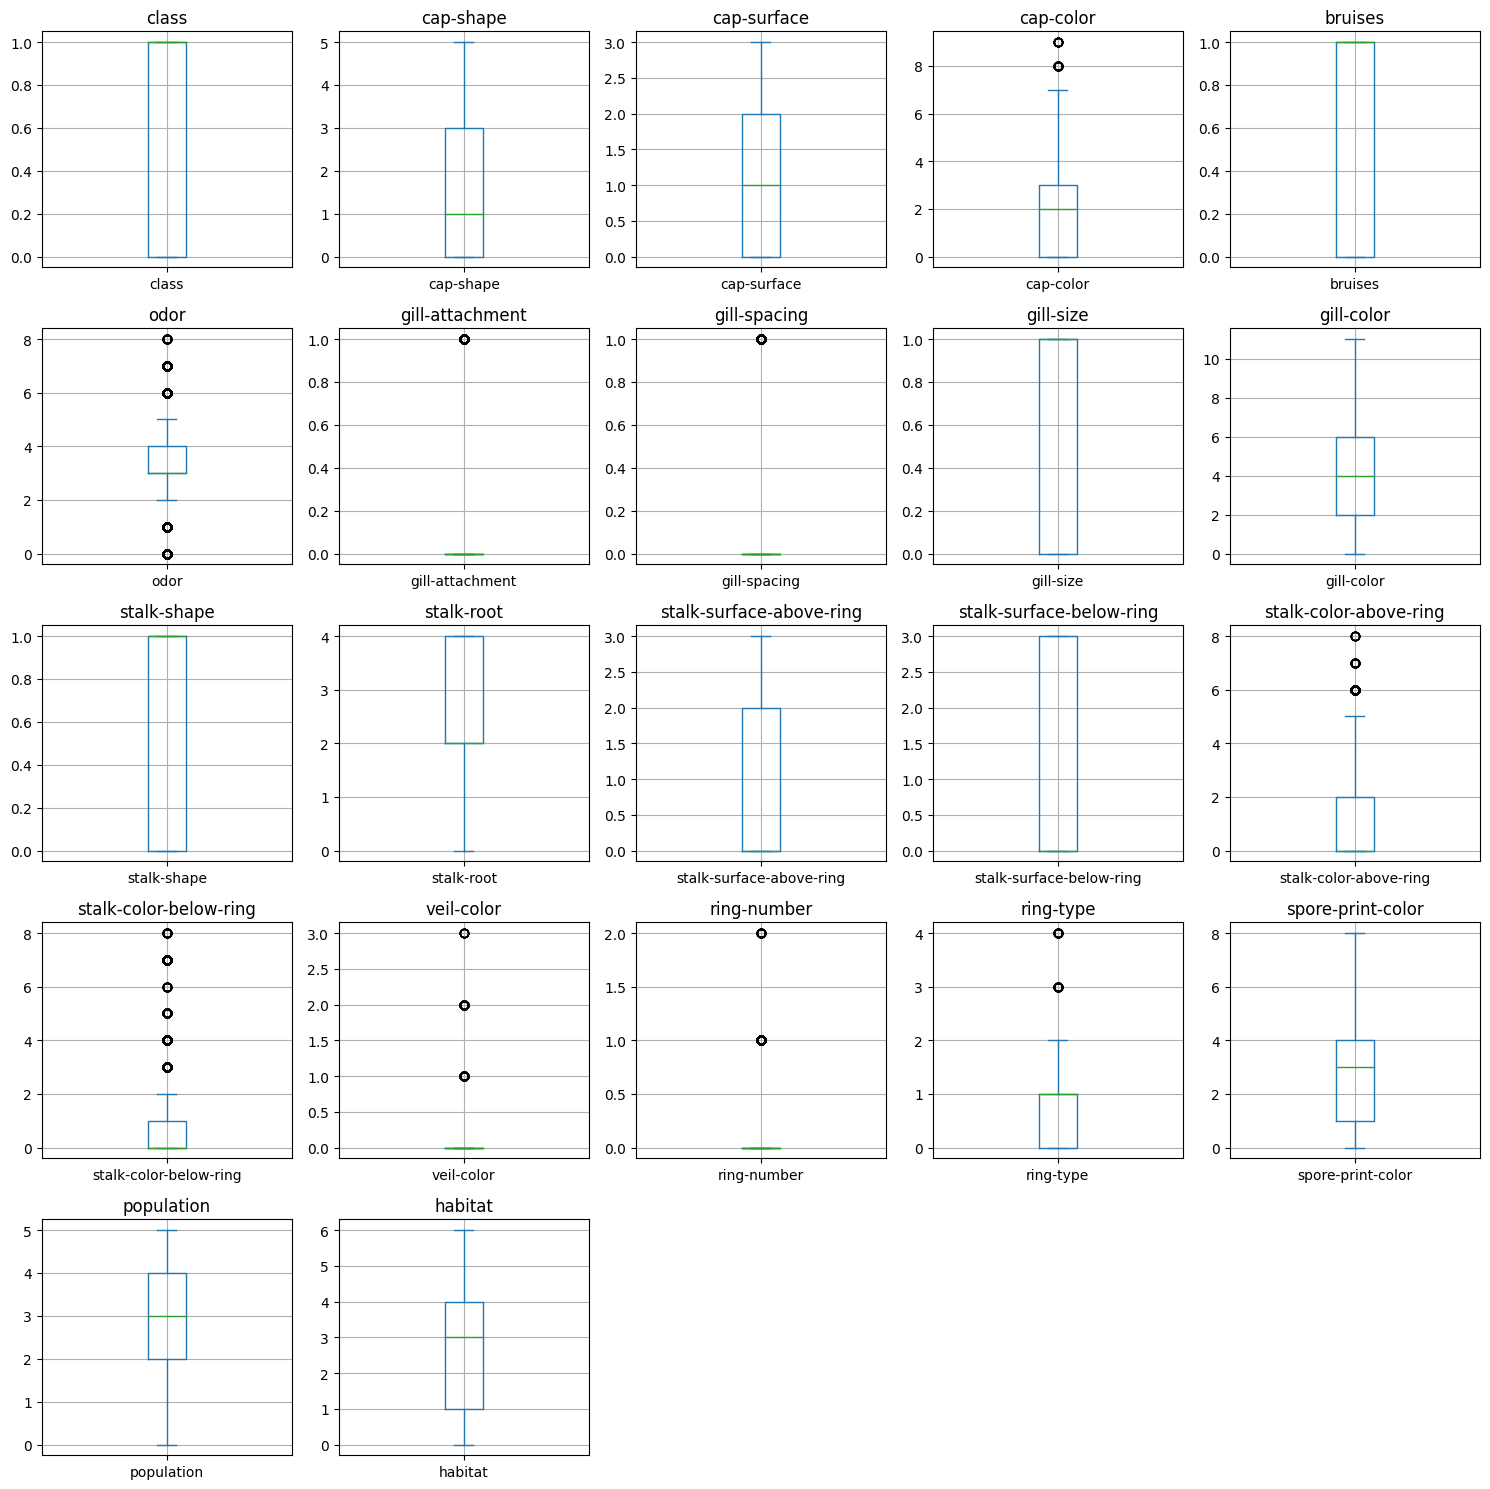

In [15]:
# Create boxplots
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# Flatten the axes so we can iterate over them
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(dataset.columns):
    dataset[col].plot(kind='box', ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(True)

# Remove any unused subplots
for j in range(len(dataset.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.savefig("images/boxplots.png")
plt.show()

* The values have a floor value of 0 and most of the features appear to be right skewed, except for the feature stalk-root, which looks to be more left skewed.
* There are outliers in cap-color, odor, gill-attachment, gill-spacing, stalk-color-above-ring, stalk-color-below-ring, veil-color, ring-number, and ring-type.
* Odor appears to be the most evenly distributed feature (it also has outliers, but in the left and right tails) followed by gill-color, population, and habitat.


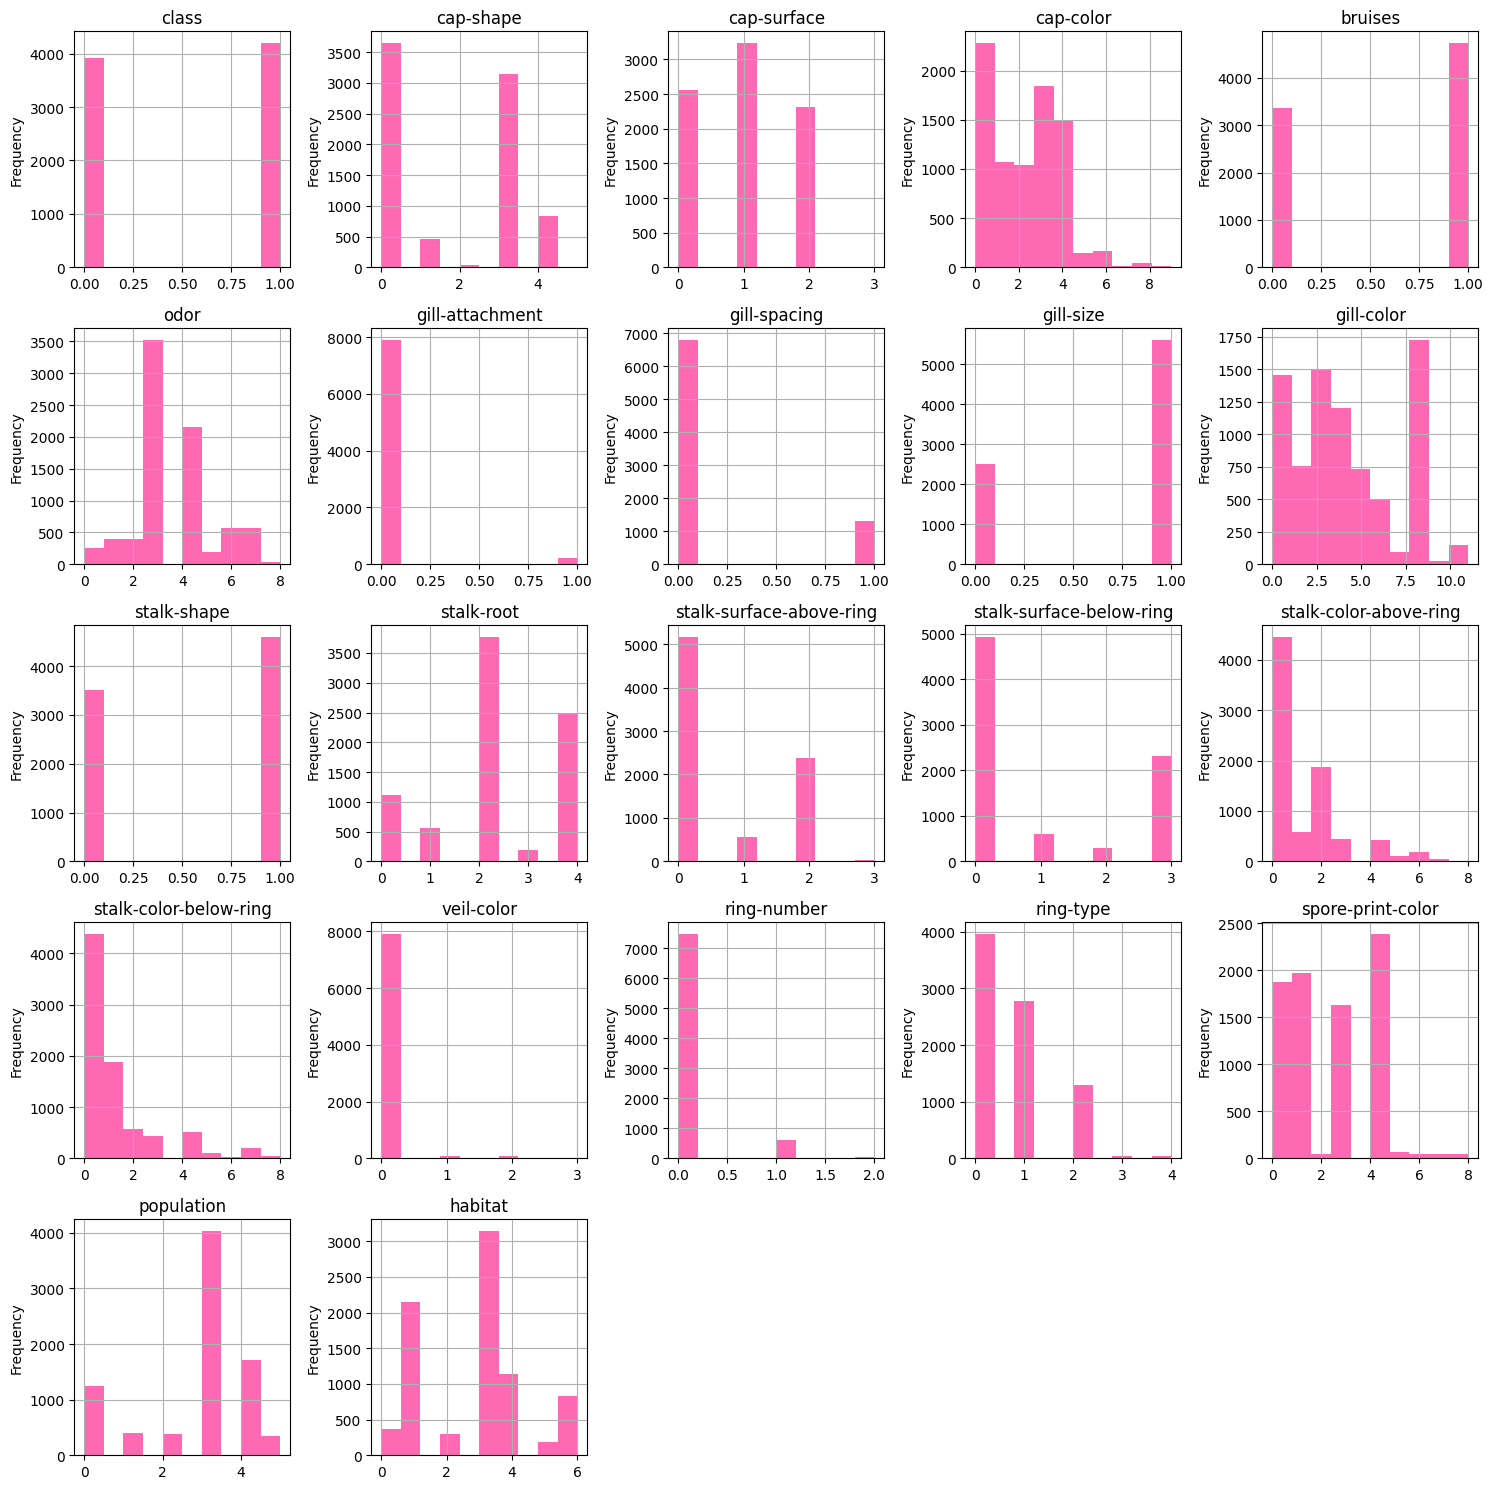

In [16]:
# Create histograms
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# Flatten the axes so we can iterate over them
axes = axes.flatten()

# Plot each column in a separate subplot with color #FF69B4
for i, col in enumerate(dataset.columns):
    dataset[col].plot(kind='hist', ax=axes[i], color='#FF69B4')
    axes[i].set_title(col)
    axes[i].grid(True)

# Remove any unused subplots
for j in range(len(dataset.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.savefig("images/histograms.png")
plt.show()

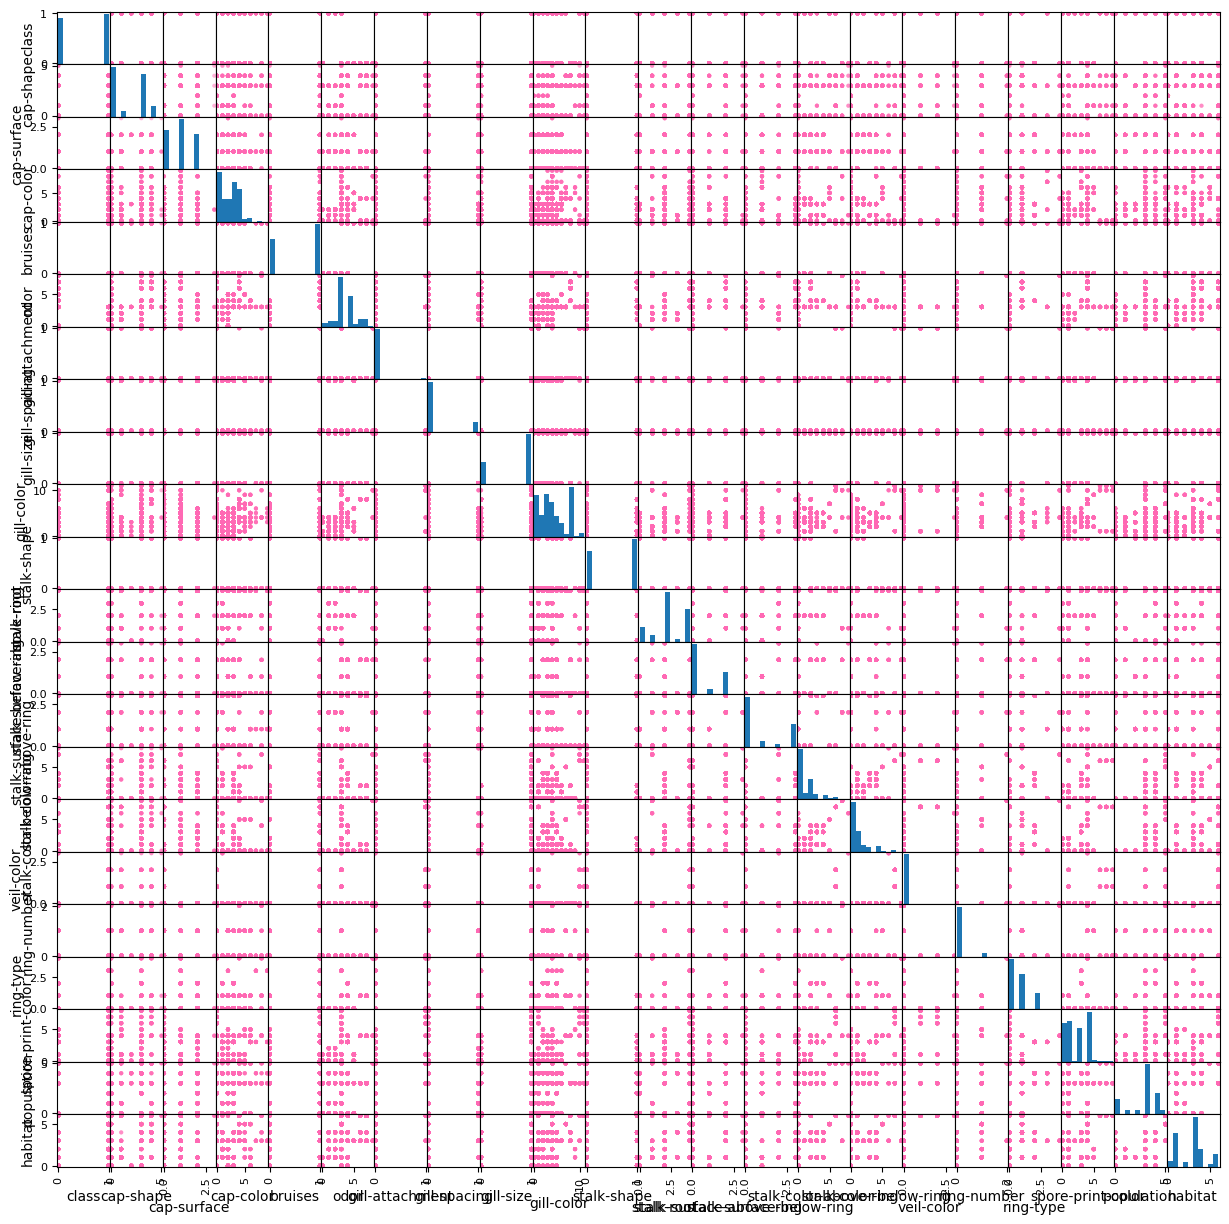

In [17]:
# Create scatter matrix
scatter_matrix(dataset, color="#FF69B4", figsize=(15, 15))

# Save the figure to a .png file
plt.savefig("images/scatter_matrix_plot.png")

# Show the plot
plt.show()